# GraphMissingEdges Challenge 1

In [4]:
#Importing bibs
# pip3 install networkx
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import statistics
from networkx.algorithms.community import k_clique_communities

In [5]:
# allCategories = pd.read_csv("../categories.csv", index_col=0)
G = nx.read_gml("../Graphs/crowdtangleCollections.gml")
# G = nx.read_gml("../Graphs/crowdtangleAccounts.gml")
print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 572
Number of edges: 81543
Average degree: 285.1154


## Initial analisys 

In [3]:
n = G.number_of_nodes()
e = G.number_of_edges()
print("Number of nodes : %d" % n)
print("Number of edges : %d" % e)
print("Number of connected components : %d" % nx.number_connected_components(G))

Number of nodes : 590
Number of edges : 33529
Number of connected components : 3


In [4]:
print("Max degree of nodes:")
sorted(G.degree, key=lambda x: x[1], reverse=True)

Max degree of nodes:


[('collection2012', 586),
 ('collection0002', 583),
 ('collection0017', 583),
 ('collection1378', 571),
 ('collection2304', 564),
 ('collection0746', 459),
 ('collection0013', 403),
 ('collection0280', 394),
 ('collection0166', 383),
 ('collection1146', 380),
 ('collection0001', 378),
 ('collection0424', 376),
 ('collection0877', 373),
 ('collection1043', 357),
 ('collection0043', 347),
 ('collection0014', 343),
 ('collection0032', 343),
 ('collection0151', 342),
 ('collection0068', 336),
 ('collection1768', 334),
 ('collection1216', 328),
 ('collection0162', 325),
 ('collection1167', 325),
 ('collection0525', 324),
 ('collection0061', 311),
 ('collection0054', 309),
 ('collection0485', 309),
 ('collection0647', 309),
 ('collection0701', 304),
 ('collection0044', 295),
 ('collection0502', 295),
 ('collection0298', 290),
 ('collection1626', 289),
 ('collection0008', 283),
 ('collection0010', 281),
 ('collection0896', 279),
 ('collection0100', 278),
 ('collection1441', 276),
 ('collectio

# Clustering Coeficient

General clustering coeficient: 0.8266
Clustering coeficient evolution analisys:
Items to remove: 2
Removed 1 degrees nodes: 0.829
Items to remove: 13
Removed 5 degrees nodes: 0.829
Items to remove: 62
Removed 10 degrees nodes: 0.81
Items to remove: 72
Removed 25 degrees nodes: 0.79
Items to remove: 74
Removed 50 degrees nodes: 0.782
Items to remove: 93
Removed 100 degrees nodes: 0.81


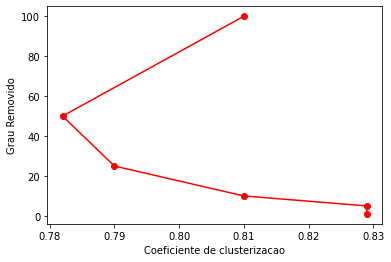

In [5]:
G = nx.read_gml("../Graphs/crowdtangleCollections.gml")
print("General clustering coeficient: "+ str(round(nx.average_clustering(G),5)))

removeDegrees = [1,5,10,25,50,100]

print("Clustering coeficient evolution analisys:")
coefList = []
degreeRemoved = []
for num in removeDegrees:
    remove = [node for node,degree in dict(G.degree()).items() if degree < num]
    print("Items to remove: " + str(len(remove)))
    G.remove_nodes_from(remove)
    coef = round(nx.average_clustering(G),3)
    coefList.append(coef)
    degreeRemoved.append(num)
    print("Removed "+ str(num) + " degrees nodes: " + str(coef))

plt.plot(coefList, degreeRemoved, 'ro-') 
plt.xlabel('Coeficiente de clusterizacao')
plt.ylabel('Grau Removido')

# Keep original file to other analisys below
G = nx.read_gml("../Graphs/crowdtangleCollections.gml")

De acordo com o coeficiente de clusterização demonstrado acima, é possível perceber que o grafo está muito longe de ser completo, pois o coeficiente geral em 0.03 está muito abaixo de 1% de possíveis conexões entre todos os nós, isso é decorrência da grande quantidade de nós e do baixo grau de conexões entre eles, isso fica evidente no histograma acima, com a remoção de nós de baixo grau, o grande aumento do coeficiente para a rede, isso cai bruscamente no final pois apenas 2 nós possuem mais de 250 arestas.
Esse coeficiente também comprova que o grafo não tem probabilidade de ter sido gerado aleatoriamente, pois há muitos nós sem arestas e alguns nós com muitas arestas, o que tornou o grafo desbalanceado.

# Nodes Degrees Distribution

Degree Mean: 156.35510204081632
Degree Median: 140


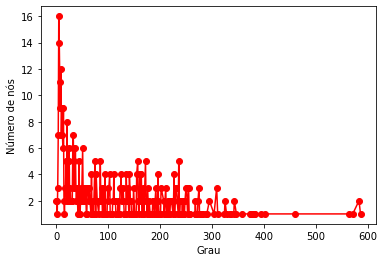

In [6]:
dicDegree = dict(G.degree())
valores = sorted(set(dicDegree.values()))
hist = [list(dicDegree.values()).count(x) for x in valores]
plt.plot(valores, hist, 'ro-') 
plt.xlabel('Grau')
plt.ylabel('Número de nós')

degreeMean = statistics.mean(valores)
print("Degree Mean: " + str(degreeMean))
degreeMedian = statistics.median(valores)
print("Degree Median: "+ str(degreeMedian))

Text(0, 0.5, 'Numero de nós')

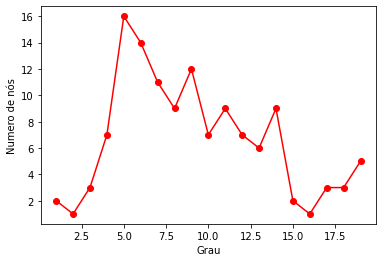

In [7]:
# Nodes degrees distribution zoomed
dicDegree1={k: v for k, v in dicDegree.items() if v > 0 and v < 20}
valores = sorted(set(dicDegree1.values()))
hist = [list(dicDegree1.values()).count(x) for x in valores]
plt.plot(valores, hist, 'ro-') 
plt.xlabel('Grau')
plt.ylabel('Numero de nós')

Text(0, 0.5, 'Numero de nós')

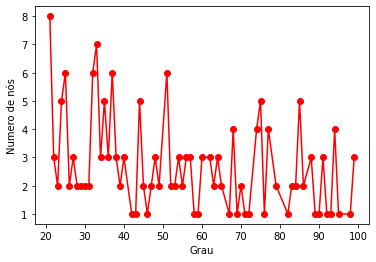

In [8]:
# Nodes degrees distribution zoomed
dicDegree2={k: v for k, v in dicDegree.items() if v > 20 and v < 100}
valores = sorted(set(dicDegree2.values()))
hist = [list(dicDegree2.values()).count(x) for x in valores]
plt.plot(valores, hist, 'ro-') 
plt.xlabel('Grau')
plt.ylabel('Numero de nós')

Text(0, 0.5, 'Numero de nós')

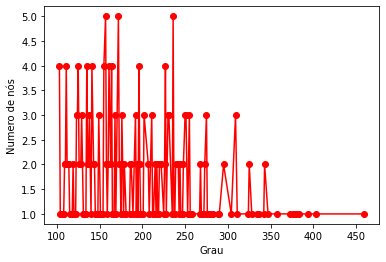

In [9]:
# Nodes degrees distribution zoomed
dicDegree3={k: v for k, v in dicDegree.items() if v > 100 and v < 502}
valores = sorted(set(dicDegree3.values()))
hist = [list(dicDegree3.values()).count(x) for x in valores]
plt.plot(valores, hist, 'ro-') 
plt.xlabel('Grau')
plt.ylabel('Numero de nós')

Através da distribuição foi percebido que nós com poucas conexões são a grande maioria apesar da média e mediana estarem 89 e 80 respectivamente, quem puxa essa conta para cima são os nós mais com mais conexões, como pode ser visto nos histogramas acima.

# Centralities

## Degree centrality

In [10]:
degree = nx.degree_centrality(G)
sort_orders = sorted(degree.items(), key=lambda degree: degree[1], reverse=True)
top50 = sort_orders[:50]
print("Centralidade de grau - Top 50")
print(top50)

# Get properties from these top50
dfDegreeCentrality = pd.DataFrame(columns=['collection','degreeCentralityValue','rph','reactionCountActual','reactionCountExpected'])

print("Centralidade de proximidade")
for key,value in top50:
    dfDegreeCentrality.loc[key] = pd.Series({
        'collection':key ,
        'degreeCentralityValue':round(value,4),
        'rph':G.nodes[key]['rph'],
        'reactionCountActual':G.nodes[key]['reactionCountActual'],
        'reactionCountExpected':G.nodes[key]['reactionCountExpected']
    })

dfDegreeCentrality = dfDegreeCentrality.set_index('collection')
print(dfDegreeCentrality)
# print(dfDegreeCentrality.info())
# print(dfDegreeCentrality.index)
dfDegreeCentrality.to_csv('degreeCentrality.csv', sep=',', encoding='utf-8')

Centralidade de grau - Top 50
[('collection2012', 0.9949066213921901), ('collection0002', 0.9898132427843803), ('collection0017', 0.9898132427843803), ('collection1378', 0.9694397283531409), ('collection2304', 0.9575551782682512), ('collection0746', 0.7792869269949066), ('collection0013', 0.6842105263157895), ('collection0280', 0.6689303904923599), ('collection0166', 0.6502546689303905), ('collection1146', 0.6451612903225806), ('collection0001', 0.6417657045840407), ('collection0424', 0.6383701188455009), ('collection0877', 0.633276740237691), ('collection1043', 0.6061120543293718), ('collection0043', 0.5891341256366723), ('collection0014', 0.5823429541595925), ('collection0032', 0.5823429541595925), ('collection0151', 0.5806451612903226), ('collection0068', 0.5704584040747028), ('collection1768', 0.567062818336163), ('collection1216', 0.5568760611205433), ('collection0162', 0.5517826825127334), ('collection1167', 0.5517826825127334), ('collection0525', 0.5500848896434635), ('collectio

## Betweenness centrality

In [11]:
betweenness = nx.betweenness_centrality(G)
sort_orders = sorted(betweenness.items(), key=lambda betweenness: betweenness[1], reverse=True)
top50 = sort_orders[:50]
print(top50)

dfBetweenness = pd.DataFrame(columns=['collection','betweennessValue','rph','reactionCountActual','reactionCountExpected'])

print("Centralidade de proximidade")
for key,value in top50:
    dfBetweenness.loc[key] = pd.Series({
        'collection':key ,
        'betweennessValue':round(value,4),
        'rph':G.nodes[key]['rph'],
        'reactionCountActual':G.nodes[key]['reactionCountActual'],
        'reactionCountExpected':G.nodes[key]['reactionCountExpected']
    })

dfBetweenness = dfBetweenness.set_index('collection')
print(dfBetweenness)
# print(dfBetweenness.info())
# print(dfBetweenness.index)
dfBetweenness.to_csv('betweennessCentrality.csv', sep=',', encoding='utf-8')

[('collection2012', 0.09024777805692802), ('collection0002', 0.08211395051022492), ('collection0017', 0.08211395051022492), ('collection1378', 0.071910581660902), ('collection2304', 0.06741145974978825), ('collection0746', 0.02388019797245434), ('collection0013', 0.013047023394913542), ('collection0280', 0.0119666804408221), ('collection0424', 0.011590983712197038), ('collection1146', 0.011102994745513904), ('collection1768', 0.011074059086210503), ('collection0001', 0.010448500475788235), ('collection0166', 0.00973752244035764), ('collection0877', 0.009340263573052815), ('collection1043', 0.009208626476783631), ('collection0151', 0.008470815016477845), ('collection0043', 0.0073171023937425176), ('collection0014', 0.007084904017596153), ('collection0032', 0.007084904017596153), ('collection0298', 0.006910733894160893), ('collection0068', 0.0059175939110344515), ('collection0162', 0.005839609158588208), ('collection1167', 0.005839609158588208), ('collection0485', 0.005787084075943843), 

## Closeness centrality

In [12]:
closeness = nx.closeness_centrality(G)
sort_orders = sorted(closeness.items(), key=lambda closeness: closeness[1], reverse=True)
top50 = sort_orders[:50]
print(top50)

dfCloseness = pd.DataFrame(columns=['collection','closenessValue','rph','reactionCountActual','reactionCountExpected'])

print("Centralidade de proximidade")
for key,value in top50:
    dfCloseness.loc[key] = pd.Series({
        'collection': key,
        'closenessValue': round(value,6),
        'rph': G.nodes[key]['rph'],
        'reactionCountActual': G.nodes[key]['reactionCountActual'],
        'reactionCountExpected': G.nodes[key]['reactionCountExpected']
    })

dfCloseness = dfCloseness.set_index('collection')
print(dfCloseness)
# print(dfCloseness.info())
# print(dfCloseness.index)
dfCloseness.to_csv('closenessCentrality.csv', sep=',', encoding='utf-8')

[('collection2012', 0.994909508795029), ('collection0002', 0.9898592067199273), ('collection0017', 0.9898592067199273), ('collection1378', 0.9701605160389338), ('collection2304', 0.9590275265106182), ('collection0746', 0.8181913163237441), ('collection0013', 0.7587636720771427), ('collection0280', 0.7500087066300988), ('collection0166', 0.7395787499007296), ('collection1146', 0.73678437175249), ('collection0001', 0.7349331547380366), ('collection0424', 0.7330912170068635), ('collection0877', 0.7303455570180738), ('collection1043', 0.7160425840532155), ('collection0043', 0.7073842698566833), ('collection0014', 0.7039792914217533), ('collection0032', 0.7039792914217533), ('collection0151', 0.7031331624657177), ('collection0068', 0.6980987961473474), ('collection1768', 0.6964366561565203), ('collection1216', 0.6914973890915804), ('collection0162', 0.6890539354198788), ('collection1167', 0.6890539354198788), ('collection0525', 0.6882432837311494), ('collection0061', 0.6778757719252342), ('

## Eigenvector centrality

In [13]:
eigenvector = nx.eigenvector_centrality(G)
sort_orders = sorted(eigenvector.items(), key=lambda eigenvector: eigenvector[1], reverse=True)
top50 = sort_orders[:50]
print(top50)

dfEigenvector = pd.DataFrame(columns=['collection','eigenvectorValue','rph','reactionCountActual','reactionCountExpected'])

print("Centralidade de proximidade")
for key,value in top50:
    dfEigenvector.loc[key] = pd.Series({
        'collection': key,
        'eigenvectorValue': round(value,6),
        'rph': G.nodes[key]['rph'],
        'reactionCountActual': G.nodes[key]['reactionCountActual'],
        'reactionCountExpected': G.nodes[key]['reactionCountExpected']
    })

dfEigenvector = dfEigenvector.set_index('collection')
print(dfEigenvector)
# print(dfEigenvector.info())
# print(dfEigenvector.index)
dfEigenvector.to_csv('eigenvectorCentrality.csv', sep=',', encoding='utf-8')

[('collection2012', 0.09665338521848446), ('collection0002', 0.0966314170982904), ('collection0017', 0.0966314170982904), ('collection1378', 0.0964742282194586), ('collection2304', 0.0963463497739032), ('collection0746', 0.09295816241267509), ('collection0013', 0.08969927123811147), ('collection0280', 0.08880503885005428), ('collection0166', 0.08869958099200928), ('collection0001', 0.08672098612241623), ('collection1146', 0.0865119756279154), ('collection0877', 0.08632928492048507), ('collection0424', 0.08419382647998874), ('collection0014', 0.0840374037017686), ('collection0032', 0.0840374037017686), ('collection0043', 0.08382028475530501), ('collection1043', 0.08341475314901492), ('collection0068', 0.08264243449134294), ('collection0525', 0.08143856400041516), ('collection1216', 0.08123748315063466), ('collection0054', 0.08066252005888629), ('collection0647', 0.08059020609055553), ('collection0151', 0.08002883229942753), ('collection0701', 0.07998119980173621), ('collection0061', 0.0

Ao se comparar os tipos de centralidades e os valores calculados para o grafo, o primeiro lugar para todas as análises  foi o local "Pai Northern Thai Kitchen", porém, os valores alteram de acordo com cada centralidade, na centralidade de grau, proximidade e intermediação, esse local ficou com valores 0.045, 0.34 e 0.053 respectivamente, isso comprova que esse nó realmente é muito importante para a rede, pois é muito utilizado como conexões de menores caminhos, possui muitas conexões e funciona como ponte principal entre muitos pares de nós, entretanto, seu valor para a centralidade Eigenvector ficou baixo (mas maior em relação aos outros nós) o que deixa a entender que é um nó que acaba perdendo um pouco de importância para buscas, mas ainda sim é a melhor opção.

Para a centralidade de proximidade, muitos nós ficaram com valores razoavelmente altos, valores acima de 0,3, o que demonstra que são nós muito próximos uns dos outros, isso explica o centro mais populoso no centro do desenho do grafo (ver imagem abaixo).

Os usuários não demonstraram nenhum local com conexão importante entre dois outros locais, que é o caso da intermediação, o maior valor foi de 0.05 e 0.01 para Pai Northern Thai Kitchen e Seven Lives Tacos Y Mariscos respectivamente, o que demonstra valores muito baixos.

# Communities

## Louvain Algorithm

Graph saved!


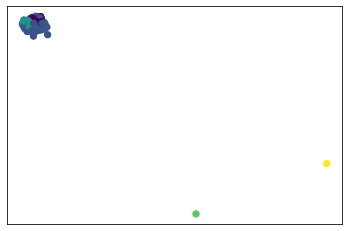

In [14]:
import community.community_louvain as community_louvain

partition = community_louvain.best_partition(G)
# print(partition)
# draw the graph
pos = nx.spring_layout(G)

for key,value in partition.items():
    G.nodes[key]['louvainCluster'] = value

nx.write_gml(G, "crowdtangleCollections.gml")
print("Graph saved!")

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

Com a aplicação do algoritmo de Louvain, foi possível detectar a divisão das comunidades, principalmente entre as do centro que não se conectaram com o anel externo, mas mesmo entre elas é possível perceber várias comunidades ao observar a tonalidade das cores e as inúmeras arestas.

## K-clique Algorithm (k=4)

In [15]:
kclique = k_clique_communities(G,4)
kclique = list(kclique)
print(str(len(kclique)) + " clusters")
print(kclique)


Através dos 144 clusters encontrados após aplicar o algoritmo K-Clique, considerando cliques de tamanho 4, ao comparar as categorias, percebeu-se uma grande hegemonia por categorias de alimentação, com grande foco aos restaurantes, além disso, outros clusters interessantes se formaram e fazem total sentido, como o caso de bares e casas noturnas e também locais com opções veganas e vegetarianas.

In [1]:
kclique3 = k_clique_communities(G,3)
kclique3 = list(kclique3)
print(str(len(kclique3)) + " clusters")
print(kclique3)


NameError: name 'k_clique_communities' is not defined